Assignment 10

You are provided with a dataset from USA Forensic Science Service
which has description of 6 types of glass; defined in terms of their
oxide content (i.e. Na, Fe, K, etc). Your task is to use K-Nearest
Neighbor (KNN) classifier to classify the glasses.




perform exploratory data analysis on the dataset using Python Pandas,
including dropping irrelevant fields for predicted values, and
standardization of each attribute.



Following data cleaning, two Scikit-Learn KNN models should be created
for two different distance metrics: Square Euclidean and Manhattan
distance. The performance of the two models using different distance
metrics should be compared in terms of accuracy to the test data and
Scikit-Learn Classification Report.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data=pd.read_csv("trainKNN.txt")

In [ ]:
train_data

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
190,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.00,7
191,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.00,7
192,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7
193,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7


In [ ]:
test_data=pd.read_csv("testKNN.txt")

In [ ]:
test_data.head()

,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1
0,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
1,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
2,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
3,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2
4,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.0,0.35,2


In [ ]:
data=pd.read_csv("glass.csv")

In [ ]:
data

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


id feature is a unnecesarry column so we can drop

In [ ]:
# data=data.drop(columns=['Id'],axis=1)

In [ ]:
data.shape

(214, 11)

In [ ]:
data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
data.tail()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [ ]:
data.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [ ]:
data.columns


Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

In [ ]:
data.isnull().sum()

Id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

no null values

EDA

<Figure size 864x576 with 0 Axes>

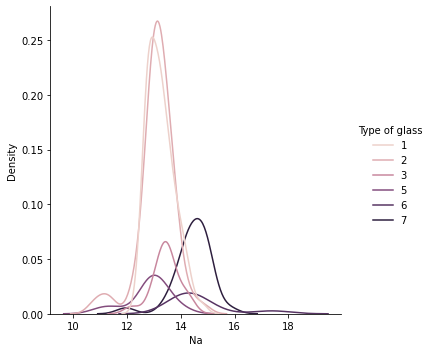

In [ ]:
plt.figure(figsize=(12,8))
sns.displot(data,x="Na",hue="Type of glass", kind="kde")

<Figure size 864x576 with 0 Axes>

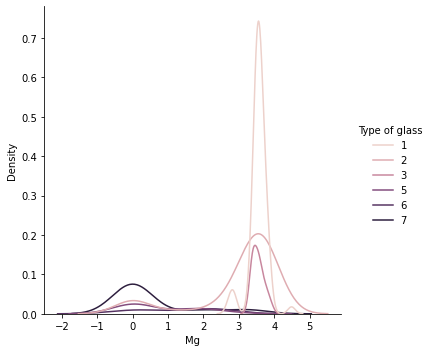

In [ ]:
plt.figure(figsize=(12,8))
sns.displot(data,x="Mg",hue="Type of glass", kind="kde")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 864x576 with 0 Axes>

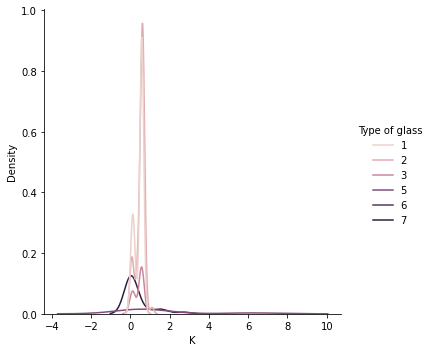

In [ ]:
plt.figure(figsize=(12,8))
sns.displot(data, x="K", hue="Type of glass", kind="kde")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 864x576 with 0 Axes>

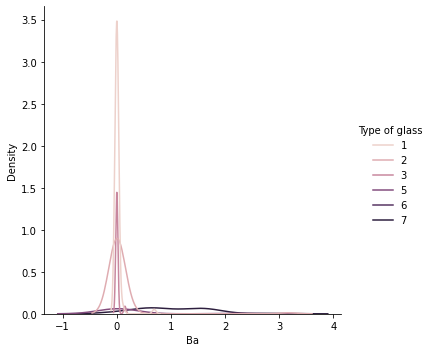

In [ ]:
plt.figure(figsize=(12,8))
sns.displot(data, x="Ba", hue="Type of glass", kind="kde")

Correlation Analysis

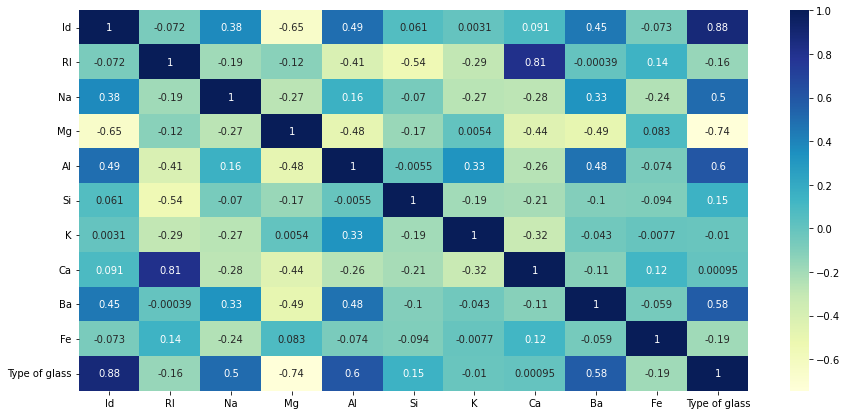

In [ ]:
plt.figure(figsize=(15,7))
corr=data.corr()
sns.heatmap(corr,annot=True,cmap="YlGnBu")

- From the above correlation analysis we observe that all the features have very less significant effect on the "Type of glass"
- specifically calcium [Ca] has more impact on the reflection index [RI]
- Sodium [Na], Aluminium [Al], Barium [Ba] has good impact on "type of glass"

Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train=data.drop(columns=["Type of glass","Id"])
y_train=data[["Type of glass"]]

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)


In [ ]:
X_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
82,1.51646,13.41,3.55,1.25,72.81,0.68,8.10,0.00,0.00
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16
180,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.00,0.00
18,1.51911,13.90,3.73,1.18,72.12,0.06,8.89,0.00,0.00
178,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.00,0.00
...,...,...,...,...,...,...,...,...,...
36,1.51909,13.89,3.53,1.32,71.81,0.51,8.78,0.11,0.00
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00
174,1.52058,12.85,1.61,2.17,72.18,0.76,9.70,0.24,0.51
127,1.52081,13.78,2.28,1.43,71.99,0.49,9.85,0.00,0.17


In [ ]:
print('Train dataset shape:',X_train.shape)
print('Test dataset shape', y_train.shape)

Train dataset shape: (171, 9)
Test dataset shape (171, 1)


In [ ]:
numeric_columns = X_train.select_dtypes(exclude='object').columns
print(numeric_columns)

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')


In [ ]:
categorical_columns = X_train.select_dtypes(include='object').columns
print(categorical_columns)

Index([], dtype='object')


In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
numeric_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='median')),
    ('scaling',StandardScaler(with_mean=True))
])

print(numeric_features)


Pipeline(steps=[('handlingmissingvalues', SimpleImputer(strategy='median')),
                ('scaling', StandardScaler())])


In [ ]:
categorical_features= Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='most_frequent')),
    ('scaling',StandardScaler(with_mean=False)),
    ('encoding',OneHotEncoder())
    
])
print(categorical_features)

Pipeline(steps=[('handlingmissingvalues',
                 SimpleImputer(strategy='most_frequent')),
                ('scaling', StandardScaler(with_mean=False)),
                ('encoding', OneHotEncoder())])


In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
processing = ColumnTransformer([
    ('numeric', numeric_features, numeric_columns),
    ('categorical', categorical_features, categorical_columns)
])

processing

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False)),
                                                 ('encoding',
                                                  OneHotEncoder())]),
                                 Index([], dtype='object'))]

In [ ]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

n_neighbors: To define the required neighbors of the algorithm. Usually, it takes 5.
metric='minkowski': This is the default parameter and it decides the distance between the points.
p=2: It is equivalent to the standard Euclidean metric.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train,y_train)


KNeighborsClassifier()

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.60      0.75      0.67        16
           2       0.64      0.64      0.64        14
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1
           7       0.80      0.80      0.80         5

    accuracy                           0.58        43
   macro avg       0.34      0.37      0.35        43
weighted avg       0.53      0.58      0.55        43

[[12  1  3  0  0  0]
 [ 4  9  0  0  1  0]
 [ 4  0  0  0  0  0]
 [ 0  2  0  0  0  1]
 [ 0  1  0  0  0  0]
 [ 0  1  0  0  0  4]]


p=1 is a Manhattan
distance.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier1=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1)
classifier1.fit(X_train,y_train)

KNeighborsClassifier(p=1)

In [ ]:
y_pred1=classifier1.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           1       0.60      0.75      0.67        16
           2       0.64      0.64      0.64        14
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1
           7       0.80      0.80      0.80         5

    accuracy                           0.58        43
   macro avg       0.34      0.37      0.35        43
weighted avg       0.53      0.58      0.55        43

[[13  2  1  0  0  0]
 [ 4  9  0  0  1  0]
 [ 4  0  0  0  0  0]
 [ 0  1  0  0  0  2]
 [ 0  1  0  0  0  0]
 [ 0  0  0  0  1  4]]


The performance of the two models using different distance
metrics should be compared in terms of accuracy to the test data and
Scikit-Learn Classification Report.